In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# Load Data
data = pd.read_csv('crop_yield.csv')

In [5]:
# Display basic information
print(data.head())
print(data.info())
print(data.describe())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 no

In [6]:
# Encode categorical variables before dropping them
columns_to_encode = ['Season', 'State']
le_Season = LabelEncoder()
data['Season'] = le_Season.fit_transform(data['Season'])
le_State = LabelEncoder()
data['State'] = le_State.fit_transform(data['State'])

In [7]:
# Drop unnecessary columns
columns_to_remove = ['Crop']
data.drop(columns=columns_to_remove, inplace=True)

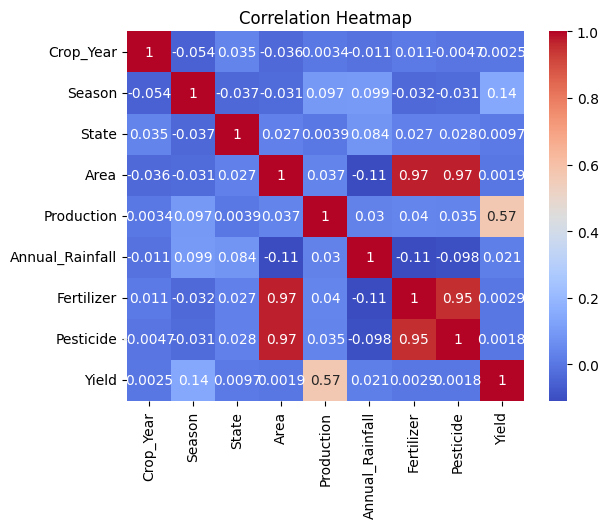

In [8]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

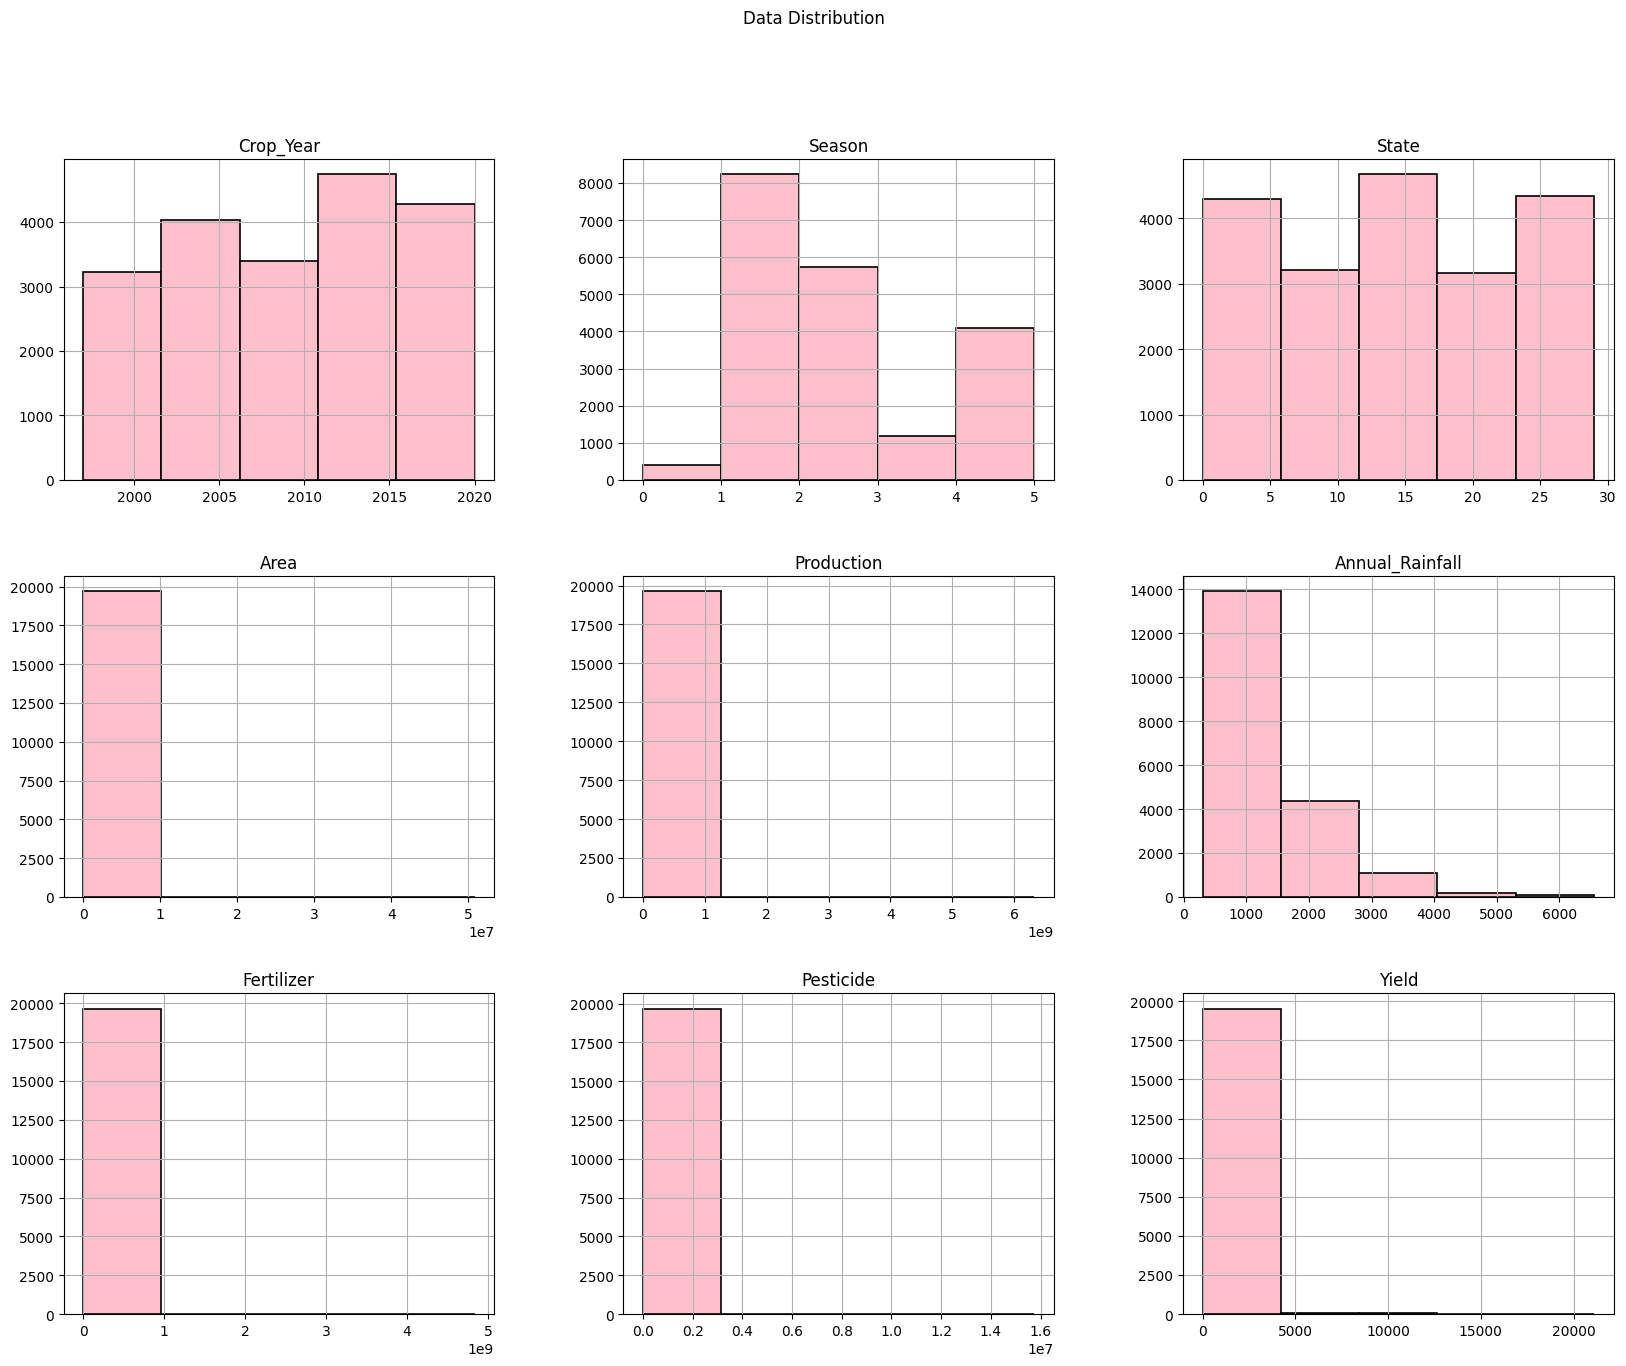

In [9]:
# Histogram distribution
data.hist(bins=5, figsize=(20, 15), color='pink', edgecolor='black', linewidth=1.2)
plt.suptitle("Data Distribution")
plt.show()

In [10]:
# Checking for missing values
print(data.isnull().sum())

Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [11]:
# Split dataset into features (X) and target (Y)
X = data.drop(columns=['Yield'])
Y = data["Yield"]

In [18]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# مدل اولیه برای انتخاب ویژگی
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=5)  # تعداد ویژگی‌های مهم

# اعمال RFE روی داده‌ها
X_train_selected = rfe.fit_transform(X_train, Y_train)
X_test_selected = rfe.transform(X_test)

# نمایش ویژگی‌های انتخاب شده
selected_features = X.columns[rfe.support_]
print("Features:", selected_features)

Features: Index(['State', 'Area', 'Production', 'Fertilizer', 'Pesticide'], dtype='object')


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# لیست مدل‌ها
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# آموزش و ارزیابی مدل‌ها
for name, model in models.items():
    model.fit(X_train_selected, Y_train)
    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    print(f"{name}: MSE={mse:.2f}, R²={r2:.2f}")

Linear Regression: MSE=487809.29, R²=0.39
Random Forest: MSE=71812.14, R²=0.91
XGBoost: MSE=94787.89, R²=0.88


In [13]:
# Use Linear Regression instead of Logistic Regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [19]:
# Mean Squared Error
MSE = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", MSE)

Mean Squared Error: 482989.1669772251
